In [ ]:
import json
import numpy as np
import pandas as pd

with open('/content/intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [ ]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

In [ ]:
num_tags = df['tag'].nunique()
print(num_tags)

80


#Data analysis

In [ ]:
#Distribution of intents
import plotly.graph_objects as go

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

#Word Cloud

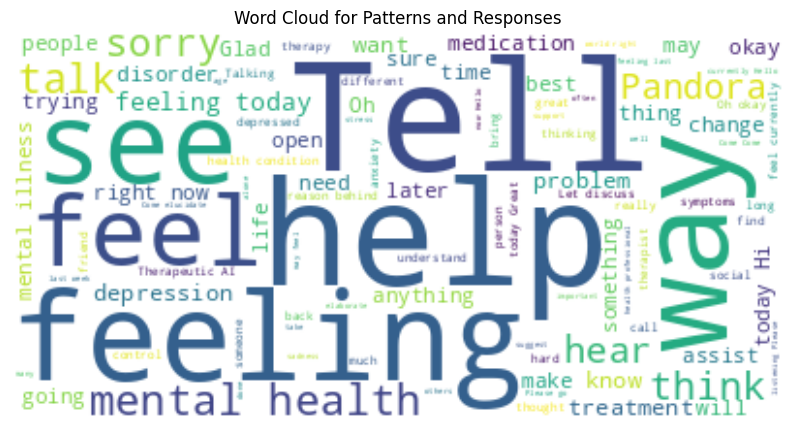

In [ ]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])
all_text = ' '.join(df['patterns']) + ' ' + ' '.join(df_responses['responses'])


from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Patterns and Responses')
plt.show()


#Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could": 2, "give": 1, "a": 12, "hand": 1, "ple

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)



number of unique words =  303


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


In [ ]:
print(X.shape)  # Ensure X has the expected shape


(232, 18)


#Modeling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(ptrn2seq, padding='post')

from tensorflow.keras.layers import Masking

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout, Masking

model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Masking(mask_value=0))  # Mask the padding values
model.add(Embedding(input_dim=vacab_size + 1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True, unroll=True))  # Disable cuDNN by unrolling
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True, unroll=True))  # Disable cuDNN by unrolling
model.add(LayerNormalization())
model.add(LSTM(32, unroll=True))  # Disable cuDNN by unrolling
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])


# Model summary
model.summary()

# # Plot the model
# plot_model(model, show_shapes=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 18, 100)             │          30,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 18, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 18, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,824 (374.31 KB)

 Trainable params: 95,824 (374.31 KB)

 Non-trainable params: 0 (0.00 B)

#prepare Ml flow

In [ ]:
!pip install mlflow
import mlflow
import mlflow.tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.4/568.4 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
# MLflow tracking
experiment_name = "mentalhealth_lstm_chatbot_experiment"
mlflow.set_experiment(experiment_name)


<Experiment: artifact_location='/content/mentalhealth_mlruns/317603611751886192', creation_time=1729346559155, experiment_id='317603611751886192', last_update_time=1729346559155, lifecycle_stage='active', name='mentalhealth_lstm_chatbot_experiment', tags={}>

In [ ]:
mlflow.set_tracking_uri("/content/mentalhealth_mlruns")

In [ ]:
# Automatically log parameters and metrics with TensorFlow Keras integration
mlflow.tensorflow.autolog()

In [ ]:
mlflow.end_run()

In [ ]:

# Train and log parameters, metrics, and model
with mlflow.start_run():
    model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=50)
    mlflow.keras.log_model(model, "MentalHealth_model")

# End the run
mlflow.end_run()


Epoch 1/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0141 - loss: 5.2201

2024/10/19 14:31:52 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.0139 - loss: 5.1943
Epoch 2/50
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1320 - loss: 3.9469

2024/10/19 14:31:52 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1342 - loss: 3.9359
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2869 - loss: 3.1872

2024/10/19 14:31:53 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2868 - loss: 3.1878
Epoch 4/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3704 - loss: 2.6282

2024/10/19 14:31:53 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3697 - loss: 2.6294
Epoch 5/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5397 - loss: 2.1025

2024/10/19 14:31:54 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5371 - loss: 2.1121
Epoch 6/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6207 - loss: 1.6972

2024/10/19 14:31:55 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6166 - loss: 1.6992
Epoch 7/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6064 - loss: 1.5466

2024/10/19 14:31:55 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6116 - loss: 1.5406
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7306 - loss: 1.1779

2024/10/19 14:31:56 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7305 - loss: 1.1781
Epoch 9/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7803 - loss: 1.0252

2024/10/19 14:31:56 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7792 - loss: 1.0314
Epoch 10/50
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8303 - loss: 0.8650

2024/10/19 14:31:57 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8294 - loss: 0.8665
Epoch 11/50
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8779 - loss: 0.8106

2024/10/19 14:31:58 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8773 - loss: 0.8048
Epoch 12/50
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9351 - loss: 0.5107

2024/10/19 14:31:59 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9321 - loss: 0.5154
Epoch 13/50
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9504 - loss: 0.4511

2024/10/19 14:32:00 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9499 - loss: 0.4522
Epoch 14/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9456 - loss: 0.4181

2024/10/19 14:32:01 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9449 - loss: 0.4198
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9792 - loss: 0.3059

2024/10/19 14:32:01 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9785 - loss: 0.3067
Epoch 16/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9540 - loss: 0.3284

2024/10/19 14:32:02 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9538 - loss: 0.3287
Epoch 17/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9732 - loss: 0.2270

2024/10/19 14:32:03 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9712 - loss: 0.2330
Epoch 18/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9778 - loss: 0.2437

2024/10/19 14:32:03 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9768 - loss: 0.2411
Epoch 19/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9611 - loss: 0.2279

2024/10/19 14:32:04 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9621 - loss: 0.2264
Epoch 20/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9845 - loss: 0.1597

2024/10/19 14:32:04 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9843 - loss: 0.1598
Epoch 21/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9960 - loss: 0.1454

2024/10/19 14:32:05 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9949 - loss: 0.1480
Epoch 22/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9803 - loss: 0.1392

2024/10/19 14:32:05 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9808 - loss: 0.1385
Epoch 23/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9980 - loss: 0.1118

2024/10/19 14:32:06 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9977 - loss: 0.1127
Epoch 24/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9870 - loss: 0.0955

2024/10/19 14:32:06 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9870 - loss: 0.0981
Epoch 25/50
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9776 - loss: 0.1359

2024/10/19 14:32:07 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9787 - loss: 0.1329
Epoch 26/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9892 - loss: 0.0980

2024/10/19 14:32:07 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9890 - loss: 0.0987


2024/10/19 14:32:07 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/10/19 14:32:07 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/10/19 14:32:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/19 14:32:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/19 14:32:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
from pyngrok import ngrok
ngrok.kill()
NGROK_AUTH_TOKN="2nY1VvhblkkhcMJOL7L5PbnZb4p_2hJgqmPtfgmQ7UVntJyPb"
ngrok.set_auth_token(NGROK_AUTH_TOKN)
ngrok_tunnel=ngrok.connect(addr="5000" ,proto="http" , bind_tls=True)
print("MLFlow Tracking UI:", ngrok_tunnel.public_url)

MLFlow Tracking UI: https://650d-34-125-169-127.ngrok-free.app


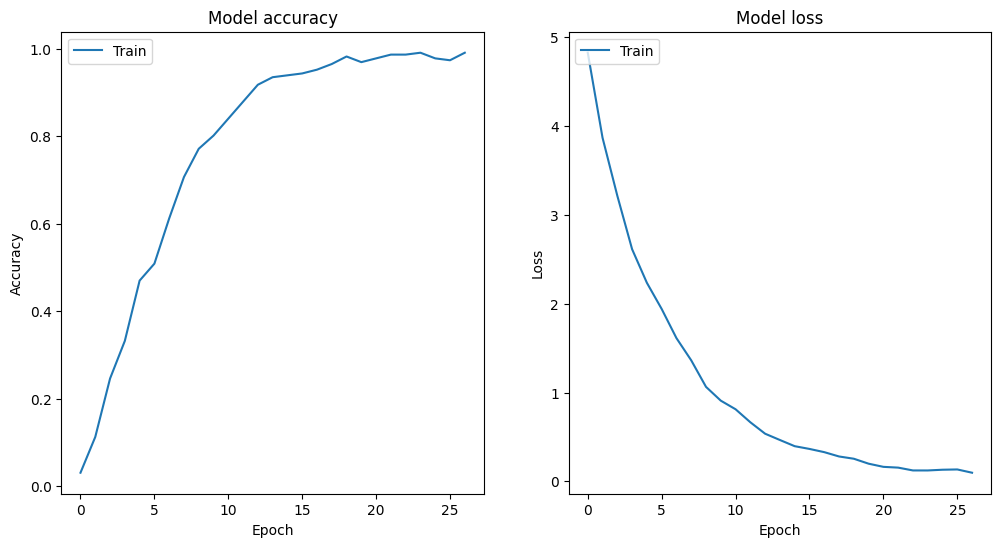

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


#Generate Response
First we should apply some text preprocessing on the pattern that is passed to the function. Next we convert the text to vector of numbers and give it to model for prediction its tag; Finally based on the tag, we choose a answer(response) randomly and return it.

In [ ]:
import re
import random
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_answer(pattern):
    text = []

    # Clean and tokenize the input pattern
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower().strip()
    text.append(txt)


    # Convert the text to token sequences
    try:
        x_test = tokenizer.texts_to_sequences(text)
    except Exception as e:
        print(f"Error in text processing: {e}")
        return "Sorry, I couldn't understand that."

    # Ensure x_test is a list of lists before passing to pad_sequences
    if not isinstance(x_test, list) or not all(isinstance(i, list) for i in x_test):
        return "Sorry, I couldn't process your input."

    # Padding the sequence to match model input size
    x_test = pad_sequences(x_test, padding='post', maxlen=X.shape[1])

    # Predicting the response category
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()

    # Getting the tag and the corresponding response
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    # Return a random response for the identified tag
    return random.choice(responses)

def chat():
    print("Chatbot: Hello! Type 'quit' to exit.")
    conversation_history = ["Bot: Hello! How can I assist you today?"]
    print(conversation_history[0])

    while True:
        try:
            user_input = input("\nYou: ")
            if user_input.lower() == 'quit':
                print("Bot: Goodbye! Take care!")
                break

            # Add user input to the conversation history
            conversation_history.append(f"User: {user_input}")

            response = generate_answer(user_input)
            print(f"Bot: {response}")
            conversation_history.append(f"Bot: {response}")

        except Exception as e:
            print(f"Error during chat: {str(e)}")
            print("Bot: Sorry, something went wrong.")

# Start the chat
chat()


Chatbot: Hello! Type 'quit' to exit.
Bot: Hello! How can I assist you today?

You: hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Bot: Great to see you. How do you feel currently?

You: i feel sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Bot: Why do you think you feel this way?

You: What's the difference between sadness and depression
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Bot: Sadness is a normal reaction to a loss, disappointment, problems, or other difficult situations. Feeling sad from time to time is just another part of being human. In these cases, feelings of sadness go away quickly and you can go about your daily life. Other ways to talk about sadness might be feeling low, feeling down, or feeling blue.A person may say they are feeling depressed, but if it goes away on its own and doesn't impact life in a big way, it probably isn't the illness of depression. Depression is a mental illness that affects your mood, the way you understand yourself, and the way you understand and relate to 

#Prompt Engineering

In [ ]:
import re
import random
import numpy as np

def generate_healthcare_response(conversation_history, user_input):
    """
    This function generates a response to a user's query about mental health or healthcare,
    applying empathy and providing informative, supportive answers.
    """
    try:
        prompt = " ".join(conversation_history) + " User: " + user_input

        # Preprocess the input
        txt = re.sub('[^a-zA-Z\']', ' ', prompt)
        txt = txt.lower()

        # Convert text to sequences
        x_test = tokenizer.texts_to_sequences([txt])  # Wrap in a list
        x_test = np.array(x_test).squeeze()  # Convert to array
        x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])  # Right-pad

        y_pred = model.predict(x_test)
        y_pred = y_pred.argmax()  # Get the index of the predicted class

        # Decode the predicted tag back to the response
        tag = lbl_enc.inverse_transform([y_pred])[0]  # Inverse transform to get the tag
        responses = df[df['tag'] == tag]['responses'].values  # Get all responses for that tag

        # Choose a single response
        if len(responses) > 0:
            response_list = random.choice(responses)  # Select one response list
            if isinstance(response_list, list):
                bot_response = random.choice(response_list)  # Choose a single response from the selected list
            else:
                bot_response = response_list
        else:
            bot_response = "Sorry, I don't have a response for that."

        return bot_response

    except Exception as e:
        print(f"Error generating healthcare response: {str(e)}")
        return "Sorry, I encountered an error while generating a healthcare response."

In [ ]:
conversation_history = [
    "User: I've been feeling very anxious lately.",
    "Bot: I'm sorry to hear that you're feeling anxious. Anxiety can be tough to manage. "
         "Would you like to talk about what might be causing these feelings?"
]
user_input = "Yes, I feel like I can't control my thoughts sometimes."
response = generate_healthcare_response(conversation_history, user_input)
print(response)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
So first I would suggest you to give yourself a break. Thinking more and more about the problem definitely does not help in solving it. You'll just end up overwhelming yourself.


In [ ]:
conversation_history = [
    "User: I can't seem to shake off my feelings of sadness.",
    "Bot: I'm sorry to hear that you're feeling this way. It's important to talk about our feelings. What do you think is causing this sadness?"
]
user_input = "I feel like I'm not accomplishing anything in my life."
response = generate_healthcare_response(conversation_history, user_input)
print(response)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Did something happen which made you feel this way?


In [ ]:
conversation_history = [
    "User: I'm feeling overwhelmed with everything happening around me.",
    "Bot: It's easy to feel overwhelmed with so much going on. Can you pinpoint any specific events or situations that are weighing on you?"
]
user_input = "There's a lot of negativity in the news lately, and it's hard to escape it."
response = generate_healthcare_response(conversation_history, user_input)
print(response)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Different kinds of therapy are more effective based on the nature of the mental health condition and/or symptoms and the person who has them (for example, children will benefit from a therapist who specializes in childrenâ€™s mental health). However, there are several different types of treatment and therapy that can help.


In [ ]:
conversation_history = [
    "User: I've been struggling to sleep at night.",
    "Bot: Sleep issues can significantly affect our mental health. What do you think is keeping you awake?"
]
user_input = "I keep replaying my day in my head and worrying about tomorrow."
# Generating a healthcare-related response
response = generate_healthcare_response(conversation_history, user_input)
print(response)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
That's no problem. I can see why you'd be stressed out about that. I can suggest you some tips to alleviate this issue. Would you like to learn more about that?
